In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
data = pd.read_csv('../00_Data/Integrated_data/Fully_integrated_data.csv')

In [3]:
# Traffic rate 결측치 제거
data = data.dropna(subset=['Traffic rate'])

In [4]:
# Traffic rate를 사분위수로 범주화
data['Traffic_rate_cat'] = pd.qcut(data['Traffic rate'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 분석에 사용할 특성 선택 및 스케일링
features = data[['Car registration', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:

# k-NN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_cat'], test_size=0.2, random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, features_scaled, data['Traffic_rate_cat'], cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Train the model on the entire dataset and evaluate on a separate test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_cat'], test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# 모델 평가
print(classification_report(y_test, predictions))

Cross-validation scores: [0.56018519 0.5301391  0.54095827 0.5935085  0.57032457]
Mean cross-validation accuracy: 0.5590231266815502
              precision    recall  f1-score   support

        High       0.49      0.59      0.54       153
         Low       0.68      0.57      0.62       179
      Medium       0.46      0.47      0.47       137
   Very High       0.73      0.71      0.72       179

    accuracy                           0.59       648
   macro avg       0.59      0.59      0.59       648
weighted avg       0.60      0.59      0.60       648



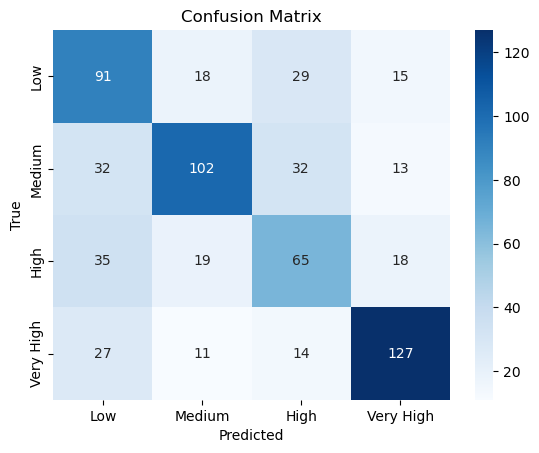

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Traffic rate를 삼분위로 범주화
data['Traffic_rate_tertile'] = pd.qcut(data['Traffic rate'], 3, labels=['Low', 'Medium', 'High'])

# 특성 선택 및 스케일링
features = data[['Car registration', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_tertile'], test_size=0.2, random_state=42)

# k-NN 모델 생성 및 훈련
knn_tertile = KNeighborsClassifier(n_neighbors=5)
knn_tertile.fit(X_train, y_train)

# 모델 평가
predictions_tertile = knn_tertile.predict(X_test)
print("Classification Report for Tertile:")
print(classification_report(y_test, predictions_tertile))

Classification Report for Tertile:
              precision    recall  f1-score   support

        High       0.70      0.83      0.76       235
         Low       0.65      0.56      0.60       225
      Medium       0.57      0.52      0.54       188

    accuracy                           0.65       648
   macro avg       0.64      0.64      0.63       648
weighted avg       0.64      0.65      0.64       648



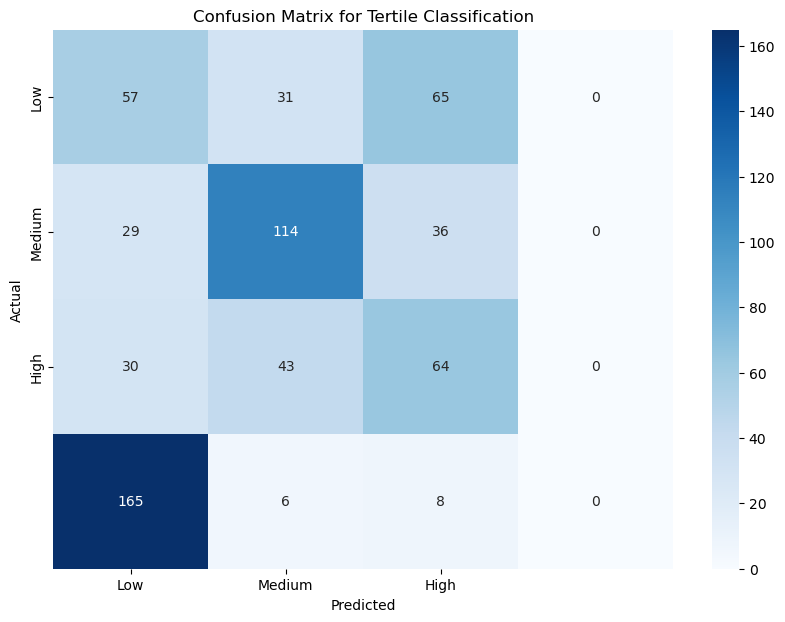

In [32]:
# 혼동 행렬 시각화
conf_matrix_tertile = confusion_matrix(y_test, predictions_tertile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tertile, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tertile Classification')
plt.show()

In [10]:
# Traffic rate를 삼분위수로 범주화
data['Traffic_rate_tertile'] = pd.qcut(data['Traffic rate'], 3, labels=['Low', 'Medium', 'High'])

# 특성 선택 및 스케일링
features = data[['Car registration', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# k-NN 모델 생성
knn_tertile = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation for tertile classification
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_tertile = cross_val_score(knn_tertile, features_scaled, data['Traffic_rate_tertile'], cv=kf, scoring='accuracy')

# Print cross-validation scores for tertile classification
print(f'Cross-validation scores for Tertile Classification: {cv_scores_tertile}')
print(f'Mean cross-validation accuracy for Tertile Classification: {cv_scores_tertile.mean()}')

# Train the model on the entire dataset and evaluate on a separate test set for tertile classification
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_tertile'], test_size=0.2, random_state=42)
knn_tertile.fit(X_train, y_train)
predictions_tertile = knn_tertile.predict(X_test)

# 모델 평가
print("Classification Report for Tertile:")
print(classification_report(y_test, predictions_tertile))

Cross-validation scores for Tertile Classification: [0.62962963 0.5950541  0.58423493 0.625966   0.5625966 ]
Mean cross-validation accuracy for Tertile Classification: 0.5994962505008873
Classification Report for Tertile:
              precision    recall  f1-score   support

        High       0.70      0.83      0.76       235
         Low       0.65      0.56      0.60       225
      Medium       0.57      0.52      0.54       188

    accuracy                           0.65       648
   macro avg       0.64      0.64      0.63       648
weighted avg       0.64      0.65      0.64       648



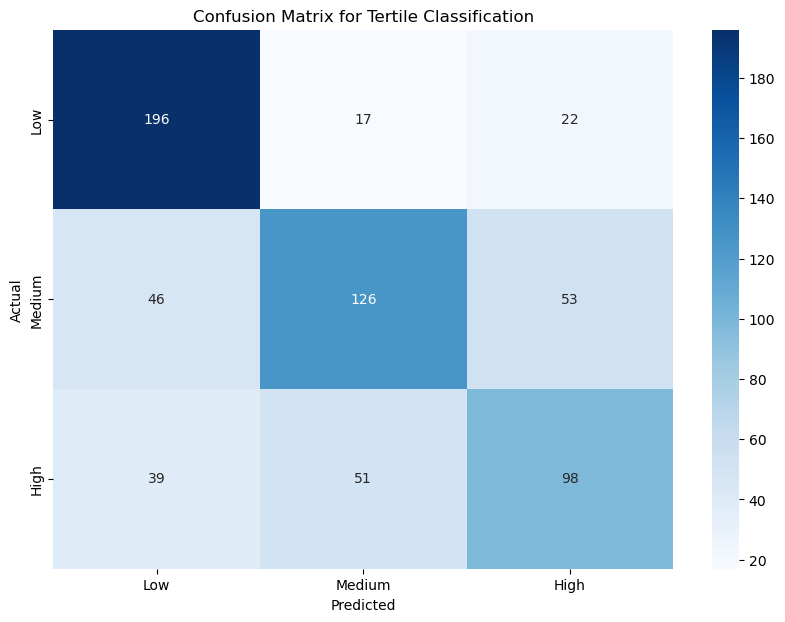

In [12]:
# 혼동 행렬 시각화
conf_matrix_tertile = confusion_matrix(y_test, predictions_tertile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tertile, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tertile Classification')
plt.show()

In [13]:
# Traffic rate를 오분위수로 범주화
data['Traffic_rate_quintile'] = pd.qcut(data['Traffic rate'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# k-NN 모델 생성
knn_quintile = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation for quintile classification
cv_scores_quintile = cross_val_score(knn_quintile, features_scaled, data['Traffic_rate_quintile'], cv=kf, scoring='accuracy')

# Print cross-validation scores for quintile classification
print(f'Cross-validation scores for Quintile Classification: {cv_scores_quintile}')
print(f'Mean cross-validation accuracy for Quintile Classification: {cv_scores_quintile.mean()}')

# Train the model on the entire dataset and evaluate on a separate test set for quintile classification
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(features_scaled, data['Traffic_rate_quintile'], test_size=0.2, random_state=42)
knn_quintile.fit(X_train_q, y_train_q)
predictions_quintile = knn_quintile.predict(X_test_q)

# 모델 평가
print("Classification Report for Quintile:")
print(classification_report(y_test_q, predictions_quintile))

Cross-validation scores for Quintile Classification: [0.54320988 0.47913447 0.54250386 0.52550232 0.49459042]
Mean cross-validation accuracy for Quintile Classification: 0.5169881886007595
Classification Report for Quintile:
              precision    recall  f1-score   support

        High       0.46      0.51      0.48       130
         Low       0.37      0.42      0.39       106
      Medium       0.43      0.40      0.41       117
   Very High       0.73      0.85      0.78       144
    Very Low       0.91      0.62      0.74       151

    accuracy                           0.58       648
   macro avg       0.58      0.56      0.56       648
weighted avg       0.60      0.58      0.58       648



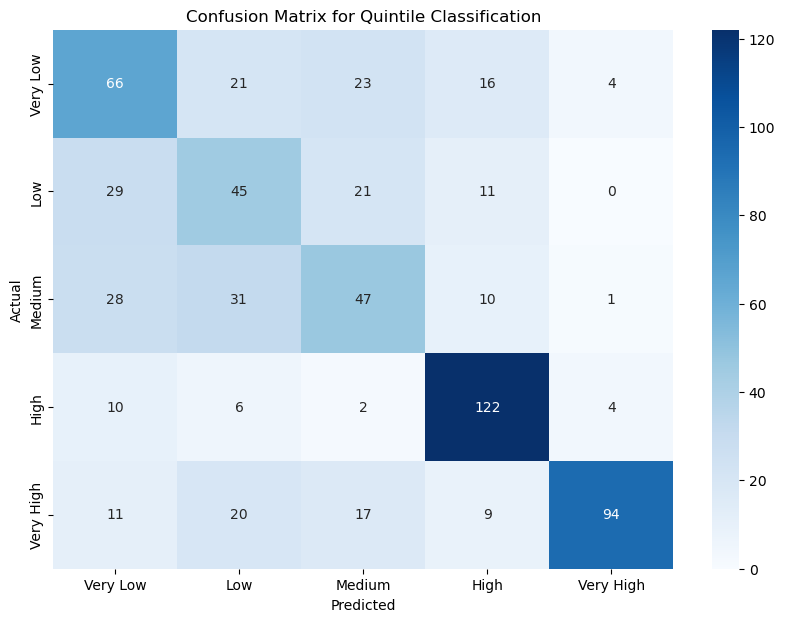

In [14]:
# 혼동 행렬 시각화
conf_matrix_quintile = confusion_matrix(y_test_q, predictions_quintile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_quintile, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], yticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Quintile Classification')
plt.show()